# Copyright

<PRE>
Copyright (c) 2022 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>



# California housing prices - modeling
In this notebook we will: 
* using California housing prices data (https://www.kaggle.com/camnugent/california-housing-prices)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Assigment: 
* please complete TODO parts


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#from tensorflow.keras.initializers import GlorotNormal, HeNormal # https://www.tensorflow.org/api_docs/python/tf/keras/initializers
from tensorflow.keras.callbacks import EarlyStopping # early stopping

#from tensorflow.keras.datasets import mnist
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import MeanSquaredError

In [129]:
# load California Housing Prices dataset
housing = fetch_california_housing()
X,Y = housing['data'], housing['target']
nb_samples = X.shape[0]

Splitting data into training, validation and test sets:

In [130]:
valid_split = 0.2
test_split  = 0.1

v_point = int(len(X)/10*7)
t_point = int(len(X)/10*8)

X_train = X[0:t_point]
Y_train = Y[0:t_point]
X_valid = X[0:v_point]
Y_valid = Y[0:v_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

Standardization of the data:

In [131]:
scaler  = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

In [132]:
X_train[:3]


array([[ 2.41761472,  0.91662721,  0.59834018, -0.15167507, -0.96121719,
        -0.08812743,  1.25839198, -1.61169516],
       [ 2.40489816, -0.64722457,  0.31754578, -0.25284611,  0.83005604,
        -0.17496218,  1.24880693, -1.60649422],
       [ 1.84707938,  1.77674569,  1.08917568, -0.05496988, -0.81129822,
        -0.04006405,  1.2440144 , -1.6168961 ]])

Defining the model (with one or two hidden layers and 8-64 neurons / layer, the input and output layers' sizes are defined by the data):

In [133]:
model = Sequential()

model.add(Dense(units=8, activation='relu', input_shape=(8,)))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units=1, input_shape=(1,)))


Inspect the model summary:

In [134]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 8)                 72        
                                                                 
 dense_36 (Dense)            (None, 8)                 72        
                                                                 
 dense_37 (Dense)            (None, 8)                 72        
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


Number of trainable parameters in the model: TODO

Compiling the model:

In [135]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])

Defining the earlystopping callback function:

In [136]:
es = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_mean_squared_error')

Train the model, use training and validation data and apply early stopping:

In [137]:
model.fit(X_train, Y_train, batch_size=128, 
                            epochs=30, verbose=1, validation_split=0.2, 
                            callbacks=[es])

Epoch 1/30
104/104 [==============================] - 1s 6ms/step - loss: 2.1359 - mean_squared_error: 2.1359 - val_loss: 1.3088 - val_mean_squared_error: 1.3088
Epoch 2/30
104/104 [==============================] - 0s 2ms/step - loss: 0.7737 - mean_squared_error: 0.7737 - val_loss: 1.0471 - val_mean_squared_error: 1.0471
Epoch 3/30
104/104 [==============================] - 0s 2ms/step - loss: 0.6215 - mean_squared_error: 0.6215 - val_loss: 0.9523 - val_mean_squared_error: 0.9523
Epoch 4/30
104/104 [==============================] - 0s 2ms/step - loss: 0.5474 - mean_squared_error: 0.5474 - val_loss: 0.8927 - val_mean_squared_error: 0.8927
Epoch 5/30
104/104 [==============================] - 0s 2ms/step - loss: 0.4943 - mean_squared_error: 0.4943 - val_loss: 0.8203 - val_mean_squared_error: 0.8203
Epoch 6/30
104/104 [==============================] - 0s 2ms/step - loss: 0.4573 - mean_squared_error: 0.4573 - val_loss: 0.7606 - val_mean_squared_error: 0.7606
Epoch 7/30
104/104 [========

Evaluate on the test data:

In [138]:
model.evaluate(X_test,Y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.4484 - mean_squared_error: 0.4484


[0.4483635127544403, 0.4483635127544403]

Make predictions:

In [139]:
preds = model.predict(X_test)

Inspecting the result on a regression plot:

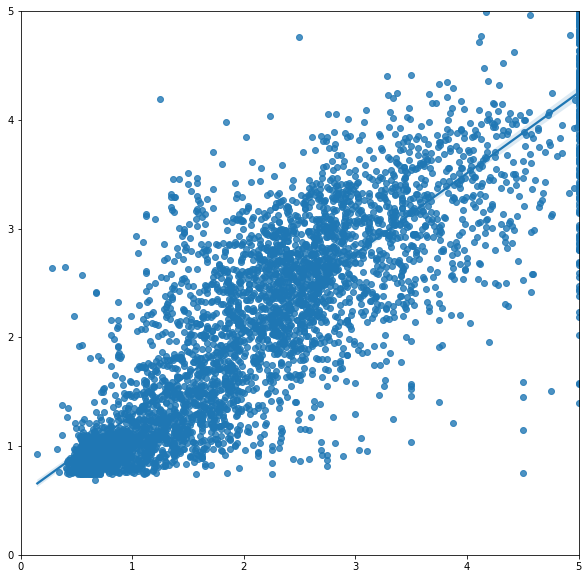

In [140]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1)).set(xlim=(0,5),ylim=(0,5)); 